<a href="https://colab.research.google.com/github/PedroLatasa/PracticaIA/blob/main/AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statistics as st

datos = pd.read_csv('BankChurners.csv')
datos

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [17]:

moda_attrition = st.mode(datos['Attrition_Flag'])
media_edad = st.mean(datos['Customer_Age'])
moda_gen = st.mode(datos['Gender'])
print('moda attri = ', moda_attrition, 'media edad = ', media_edad, 'Moda genero = ', moda_gen)

#Eliminamos el Nº de cliente por que no sirve para nada

datos2 = datos.drop(columns = ['CLIENTNUM'])

#Eliminamos las columnas de Naive Bayes

datos3 = datos2.drop(datos2.columns[-2:], axis = 1)

datos4 = datos3.replace({'Gender' : {'F' : 0, 'M' : 1}})

#Quitamos los que están fuera de la cobertura del banco attrition

datos5 = datos4.query('Attrition_Flag != "Attrited Customer"')

#Eliminamos la columna attrited por que ahora son todos iguales
datos6 = datos5.drop(columns = ['Attrition_Flag'])
datos6

#Sacamos los valores unicos de la variable Income_Category para saber cuales son

print('Los datos unicos, son: ',datos6['Income_Category'].unique())

#Vemos que hay valores Unkown, por lo que pasamos a reemplazarlos por la moda de los datos, la calculamos

moda_income = st.mode(datos6['Income_Category'])
print('La moda del income, es: ', moda_income)

datos6

#La moda de Income es menos de 40k vamos a hacer una visualizacion rapida para ver si los datos de unkown
#Income coinciden con los de less than 40k, para ello usaremos la moda de su genero y la moda de sus
#estudios, en caso de que concuerden los sustituiremos (Unkown -> Less than 40k)

moda_unk_gen = datos6[datos6['Income_Category'] == 'Unknown']['Gender'].mode()
moda_unk_est = datos6[datos6['Income_Category'] == 'Unknown']['Education_Level'].mode()
print('La moda (0 = F, 1 = M) de genero con unkown income es: ' ,moda_unk_gen)
print('La moda de estudios con unkown income es: ', moda_unk_est)

#Vemos que la moda, es decir la mayoria de gente en unknown, son mujeres y que la mayoria son graduate,
#asi pues susitituire los valores de unknown, por los valores de moda de las mujeres que sean graduate.

moda_fem_grad = datos6[(datos6['Gender'] == 0) & (datos6['Education_Level'] == 'Graduate')]['Income_Category'].mode()
print('La moda de Income de mujeres graduate es de: ', moda_fem_grad)

#Vemos que la moda de Income de Mujeres Graduate es también de Less than 40k por lo que sustituimos los
#valores unknown por Less than 40k

datos6['Income_Category'] = datos6['Income_Category'].replace('Unknown', 'Less than $40K')
datos7 = datos6

#Comprobamos el cambio

print('Los nuevos datos unicos son: ',datos7['Income_Category'].unique())

#Ahora hacemos lo mismo con Education_Level

print('Los datos unicos de Educacion son: ', datos7['Education_Level'].unique())

print('La moda de Education_Levele es:', datos7['Education_Level'].mode())

#Cambiamos unknown por su moda de dato que es Graduate

datos7['Education_Level'] = datos7['Education_Level'].replace('Unknown', 'Graduate')
datos8 = datos7

datos8

moda attri =  Existing Customer media edad =  46.32596030413745 Moda genero =  F
Los datos unicos, son:  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
La moda del income, es:  Less than $40K
La moda (0 = F, 1 = M) de genero con unkown income es:  0    0
Name: Gender, dtype: int64
La moda de estudios con unkown income es:  0    Graduate
Name: Education_Level, dtype: object
La moda de Income de mujeres graduate es de:  0    Less than $40K
Name: Income_Category, dtype: object
Los nuevos datos unicos son:  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Los datos unicos de Educacion son:  ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
La moda de Education_Levele es: 0    Graduate
Name: Education_Level, dtype: object


<ipython-input-17-cae22c4925bb>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos4 = datos3.replace({'Gender' : {'F' : 0, 'M' : 1}})


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,46,1,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10117,57,1,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10120,54,1,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,56,0,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164


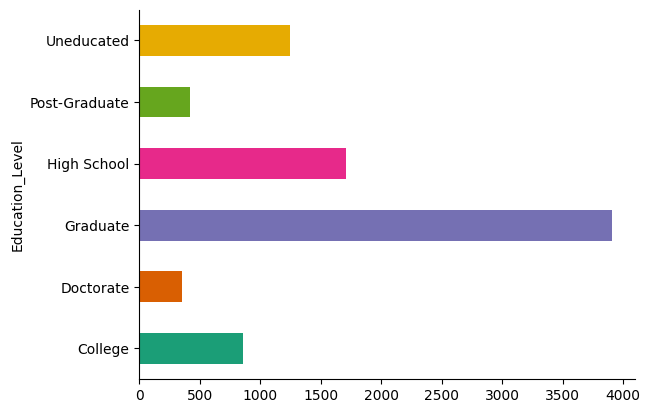

In [7]:
# @title Education_Level

from matplotlib import pyplot as plt
import seaborn as sns
datos6.groupby('Education_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# Revisar valores únicos en columnas categóricas clave
columnas_categoricas = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in columnas_categoricas:
    print(f"Valores únicos en {col}:")
    print(datos[col].unique())


Valores únicos en Attrition_Flag:
['Existing Customer' 'Attrited Customer']
Valores únicos en Gender:
['M' 'F']
Valores únicos en Education_Level:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Valores únicos en Marital_Status:
['Married' 'Single' 'Unknown' 'Divorced']
Valores únicos en Income_Category:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Valores únicos en Card_Category:
['Blue' 'Gold' 'Silver' 'Platinum']


In [19]:
# Reemplazar valores "Unknown" en la columna Income_Category por la moda
moda_income = datos['Income_Category'].mode()[0]
datos['Income_Category'] = datos['Income_Category'].replace('Unknown', moda_income)

# Reemplazar valores nulos (si existen) con la moda o media según la columna
datos.fillna(datos.mode().iloc[0], inplace=True)


In [20]:
# Revisar las columnas numéricas
columnas_numericas = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
print(datos[columnas_numericas].describe())


       Customer_Age  Dependent_count  Months_on_book  Credit_Limit  \
count  10127.000000     10127.000000    10127.000000  10127.000000   
mean      46.325960         2.346203       35.928409   8631.953698   
std        8.016814         1.298908        7.986416   9088.776650   
min       26.000000         0.000000       13.000000   1438.300000   
25%       41.000000         1.000000       31.000000   2555.000000   
50%       46.000000         2.000000       36.000000   4549.000000   
75%       52.000000         3.000000       40.000000  11067.500000   
max       73.000000         5.000000       56.000000  34516.000000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
count         10127.000000     10127.000000          10127.000000   
mean           1162.814061      7469.139637              0.759941   
std             814.987335      9090.685324              0.219207   
min               0.000000         3.000000              0.000000   
25%             359.0000

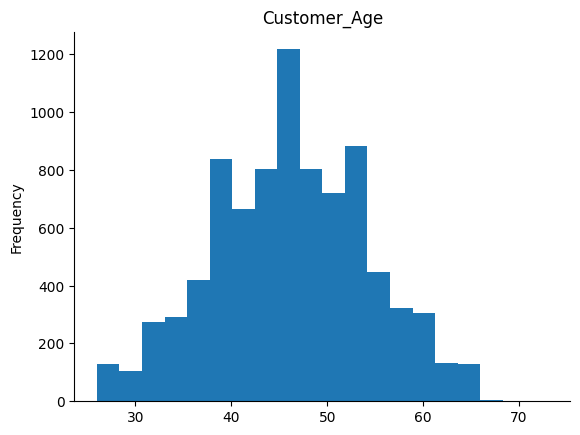

In [6]:
# @title Customer_Age

from matplotlib import pyplot as plt
datos6['Customer_Age'].plot(kind='hist', bins=20, title='Customer_Age')
plt.gca().spines[['top', 'right',]].set_visible(False)